# Project : Car Price Prediction Using ANN Model

### Objective:
The objective of this project is to build a machine learning model that predicts the **selling price** of a car based on various features such as the car's name, manufacturing year, current price, kilometers driven, fuel type, seller type, transmission type, and ownership history. This model will help potential sellers or buyers estimate a car’s resale value more accurately.

### Updated Data Description:
1. **Car_Name**: The name or model of the car.
   - Data Type: `object` (Categorical)
   - Example: "Maruti Swift"

2. **Year**: The manufacturing year of the car. This can be used to derive the car's age.
   - Data Type: `int64`
   - Example: 2015

3. **Selling_Price**: The price at which the car was sold (in lakhs of Indian Rupees). This is the target variable for prediction.
   - Data Type: `float64`
   - Example: 4.5 (lakhs INR)

4. **Present_Price**: The current market price of the car (in lakhs of Indian Rupees). It reflects the car's present value based on its condition and market demand.
   - Data Type: `float64`
   - Example: 6.7 (lakhs INR)

5. **Kms_Driven**: The total kilometers the car has been driven. It indicates how much the car has been used, which is an important factor in determining the car's value.
   - Data Type: `int64`
   - Example: 40000 (km)

6. **Fuel_Type**: The type of fuel used by the car.
   - Data Type: `object` (Categorical)
   - Possible Values:
     - `Petrol`
     - `Diesel`
     - `CNG`

7. **Seller_Type**: The type of seller, indicating whether the car is being sold by a dealer or an individual.
   - Data Type: `object` (Categorical)
   - Possible Values:
     - `Dealer`
     - `Individual`

8. **Transmission**: The transmission type of the car.
   - Data Type: `object` (Categorical)
   - Possible Values:
     - `Manual`
     - `Automatic`

9. **Owner**: The number of previous owners of the car. This feature indicates how many people have owned the car before the current owner.
   - Data and feature selection to improve model performance.

# EDA

In [2]:
# Importing the necessary libraries
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

import keras
from keras_tuner import RandomSearch
from keras.models import Sequential
from keras.layers import Dense,ReLU,Dropout


In [4]:
# Load dataset
df = pd.read_csv("car data.csv")

#### Descriptive Analysis

In [5]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [170]:
df.tail()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
296,2016,9.50,11.6,33988,0,0,0,1
297,2015,4.00,5.9,60000,0,1,0,1
298,2009,3.35,11.0,87934,0,1,0,1
299,2017,11.50,12.5,9000,0,0,0,1
300,2016,5.30,5.9,5464,0,1,0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [155]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,2013.619529,4.599663,7.548620,36877.478114,0.043771,0.804714,0.356902,0.868687
std,2.901541,4.999525,8.595592,39139.265550,0.249533,0.397090,0.479894,0.338313
min,2003.000000,0.100000,0.320000,500.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,0.800000,1.200000,15000.000000,0.000000,1.000000,0.000000,1.000000
50%,2014.000000,3.600000,6.100000,31604.000000,0.000000,1.000000,0.000000,1.000000
75%,2016.000000,6.000000,9.850000,48767.000000,0.000000,1.000000,1.000000,1.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000,1.000000,1.000000,1.000000


In [156]:
df.size

2376

In [157]:
df.shape

(297, 8)

In [158]:
df.ndim

2

In [ ]:
df.drop(["Car_Name"],axis=1,inplace=True)

In [10]:
df.duplicated().sum()

2

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.isna().sum().sum()

0

In [16]:
df.Fuel_Type.value_counts()

Petrol    239
Diesel     58
CNG         2
Name: Fuel_Type, dtype: int64

In [18]:
df = df[(df["Fuel_Type"] == "Petrol") | (df["Fuel_Type"] == "Diesel")]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           297 non-null    int64  
 1   Selling_Price  297 non-null    float64
 2   Present_Price  297 non-null    float64
 3   Kms_Driven     297 non-null    int64  
 4   Fuel_Type      297 non-null    object 
 5   Seller_Type    297 non-null    object 
 6   Transmission   297 non-null    object 
 7   Owner          297 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 20.9+ KB


In [20]:
df.Fuel_Type.value_counts()

Petrol    239
Diesel     58
Name: Fuel_Type, dtype: int64

In [22]:
df.Seller_Type.value_counts()

Dealer        191
Individual    106
Name: Seller_Type, dtype: int64

### Label Encoding

In [23]:
df = pd.get_dummies(df,drop_first=True,dtype="int64")

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    297 non-null    int64  
 1   Selling_Price           297 non-null    float64
 2   Present_Price           297 non-null    float64
 3   Kms_Driven              297 non-null    int64  
 4   Owner                   297 non-null    int64  
 5   Fuel_Type_Petrol        297 non-null    int64  
 6   Seller_Type_Individual  297 non-null    int64  
 7   Transmission_Manual     297 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 20.9 KB


## Feature Engineering

Create a new feature "Age" by using the Year of purchase.

In [26]:
X = df.drop("Selling_Price",axis=1)
Y = df.Selling_Price

### RFE Based Feature Selection

In [27]:
model = LinearRegression()
rfe = RFE(model)
fit  = rfe.fit(X,Y)

In [28]:
fit.n_features_

3

In [29]:
fit.ranking_

array([2, 4, 5, 3, 1, 1, 1])

In [30]:
fit.support_

array([False, False, False, False,  True,  True,  True])

In [31]:
X.columns

Index(['Year', 'Present_Price', 'Kms_Driven', 'Owner', 'Fuel_Type_Petrol',
       'Seller_Type_Individual', 'Transmission_Manual'],
      dtype='object')

### Tree Based Feature Selection

In [32]:
model = DecisionTreeRegressor()
model.fit(X,Y)

DecisionTreeRegressor()

In [33]:
(model.feature_importances_)

array([8.40814957e-02, 8.90087154e-01, 1.81194331e-02, 2.02016574e-04,
       7.11044993e-03, 7.01033968e-05, 3.29347709e-04])

### PPScore for Model Selection

In [42]:
pp_score = pps.matrix(df)

In [43]:
pp_score

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Year,Year,1.00000,predict_itself,True,None,0.000000,1.000000,None
1,Year,Selling_Price,0.00000,regression,True,mean absolute error,3.303906,3.336422,DecisionTreeRegressor()
2,Year,Present_Price,0.00000,regression,True,mean absolute error,5.295017,5.648810,DecisionTreeRegressor()
3,Year,Kms_Driven,0.15054,regression,True,mean absolute error,21670.360269,18408.115068,DecisionTreeRegressor()
4,Year,Owner,0.00000,regression,True,mean absolute error,0.043771,0.090666,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
59,Transmission_Manual,Kms_Driven,0.00000,regression,True,mean absolute error,21670.360269,22824.595301,DecisionTreeRegressor()
60,Transmission_Manual,Owner,0.00000,regression,True,mean absolute error,0.043771,0.083897,DecisionTreeRegressor()
61,Transmission_Manual,Fuel_Type_Petrol,0.00000,regression,True,mean absolute error,0.195286,0.317502,DecisionTreeRegressor()
62,Transmission_Manual,Seller_Type_Individual,0.00000,regression,True,mean absolute error,0.356902,0.462473,DecisionTreeRegressor()


In [44]:
pp_score = pp_score[["x","y","ppscore"]]

In [46]:
pp_score = pp_score[pp_score["y"]=="Selling_Price"]

In [48]:
pp_score.sort_values(by="ppscore",ascending=False)

,x,y,ppscore
9,Selling_Price,Selling_Price,1.000000
17,Present_Price,Selling_Price,0.555254
49,Seller_Type_Individual,Selling_Price,0.285163
41,Fuel_Type_Petrol,Selling_Price,0.082623
1,Year,Selling_Price,0.000000
25,Kms_Driven,Selling_Price,0.000000
33,Owner,Selling_Price,0.000000
57,Transmission_Manual,Selling_Price,0.000000


## Visualization

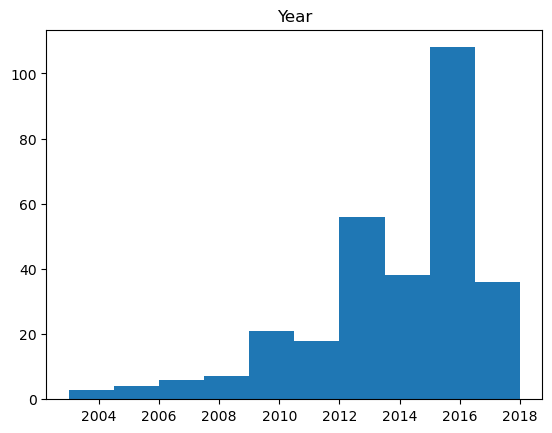

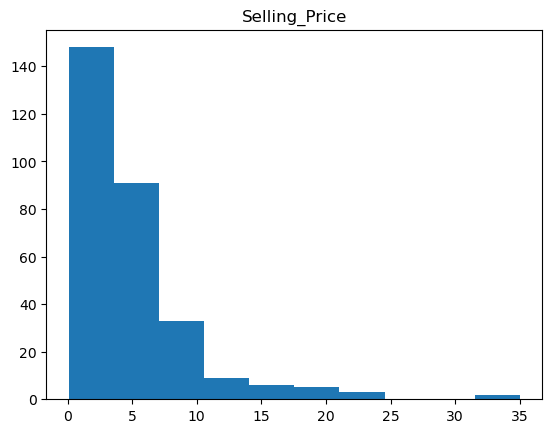

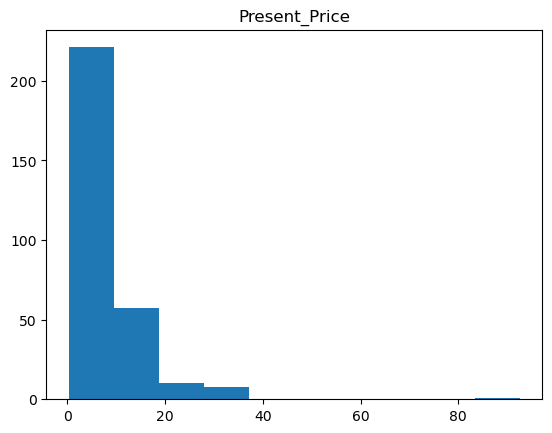

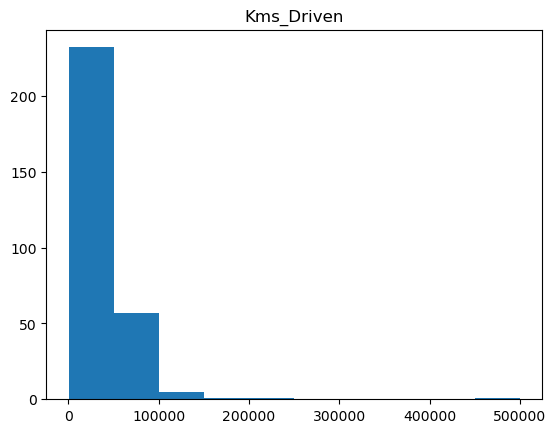

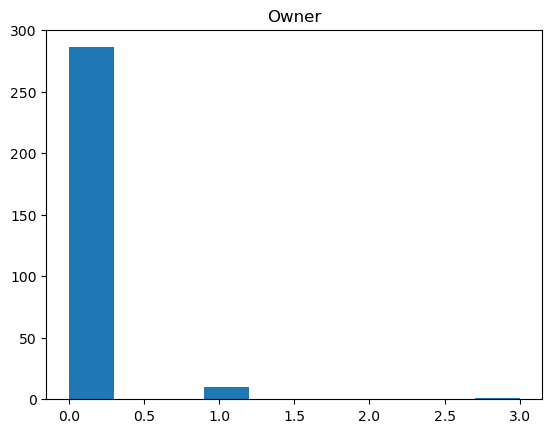

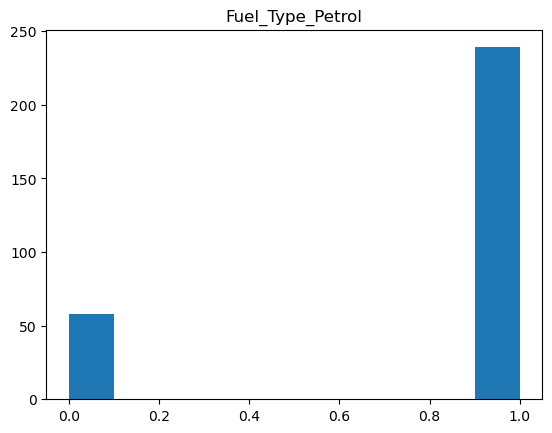

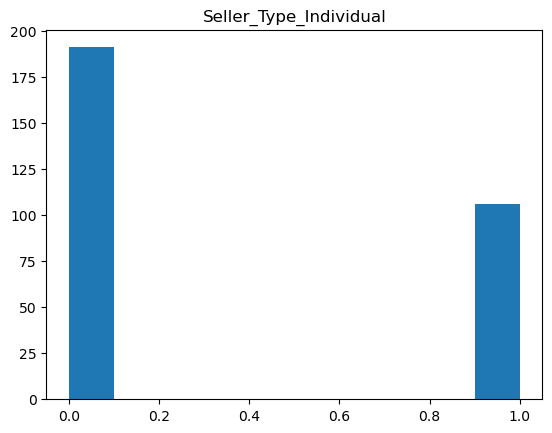

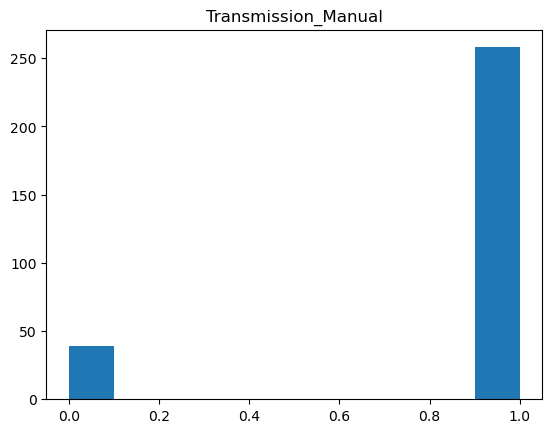

In [159]:
# Histogram 
for column in df.columns:
    plt.hist(x=df[column])
    plt.title(column)
    plt.show()

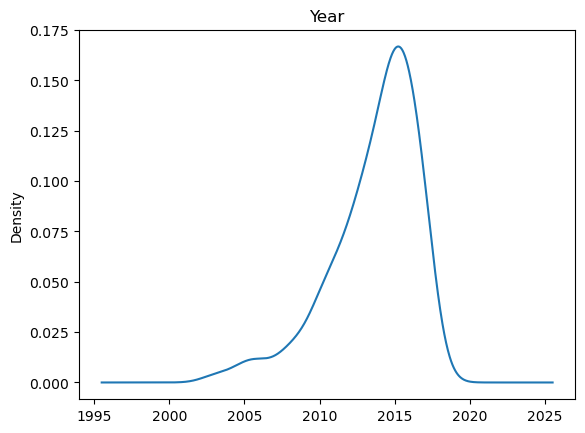

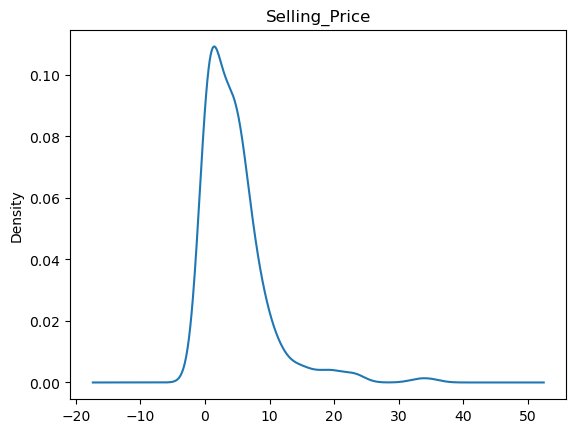

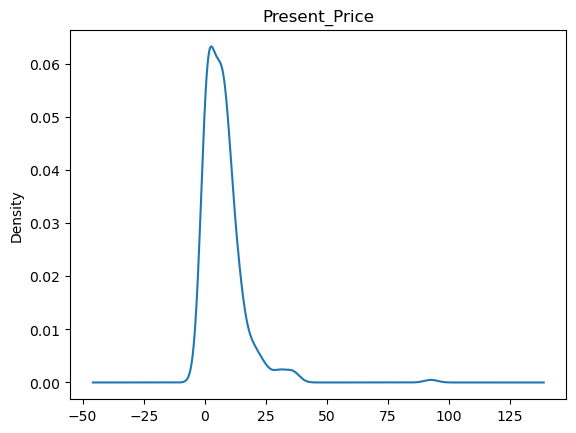

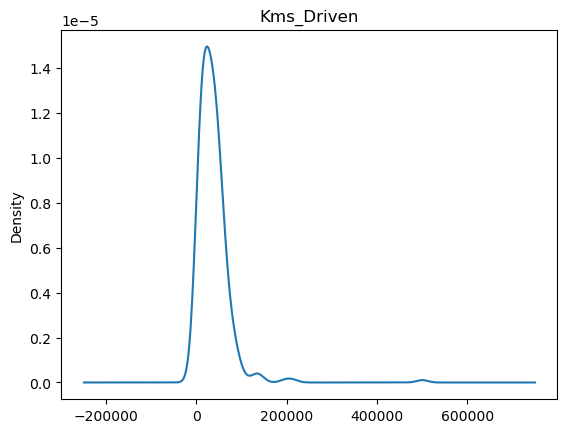

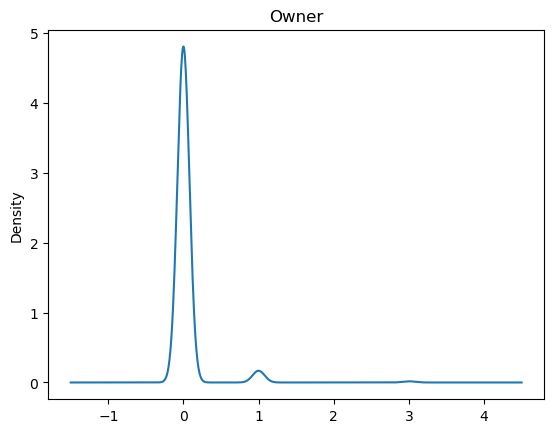

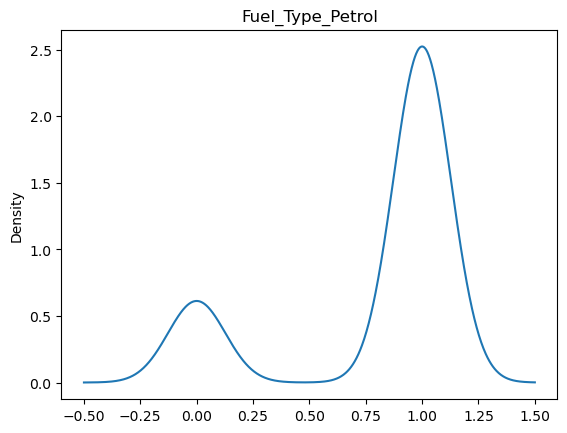

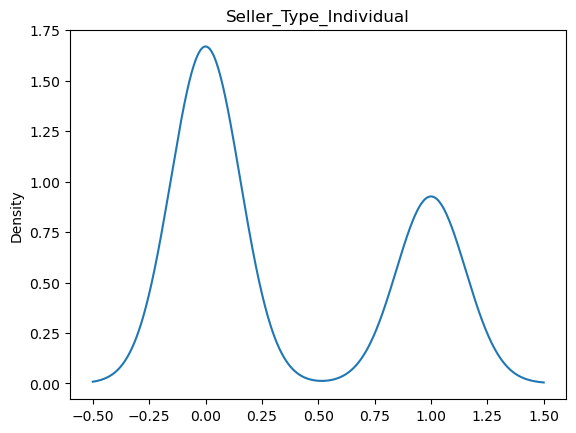

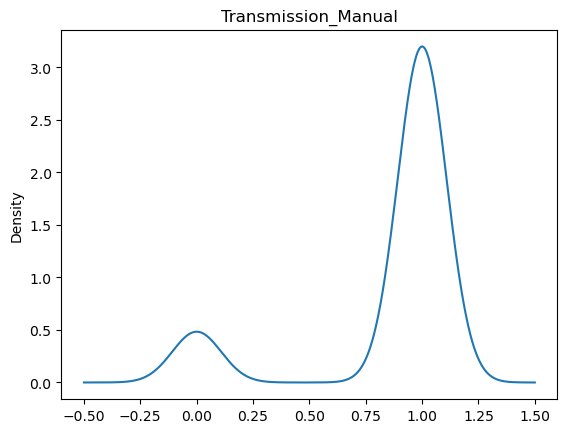

In [50]:
# KDE plot
for column in df.columns:
    df[column].plot(kind="kde")
    plt.title(column)
    plt.show()

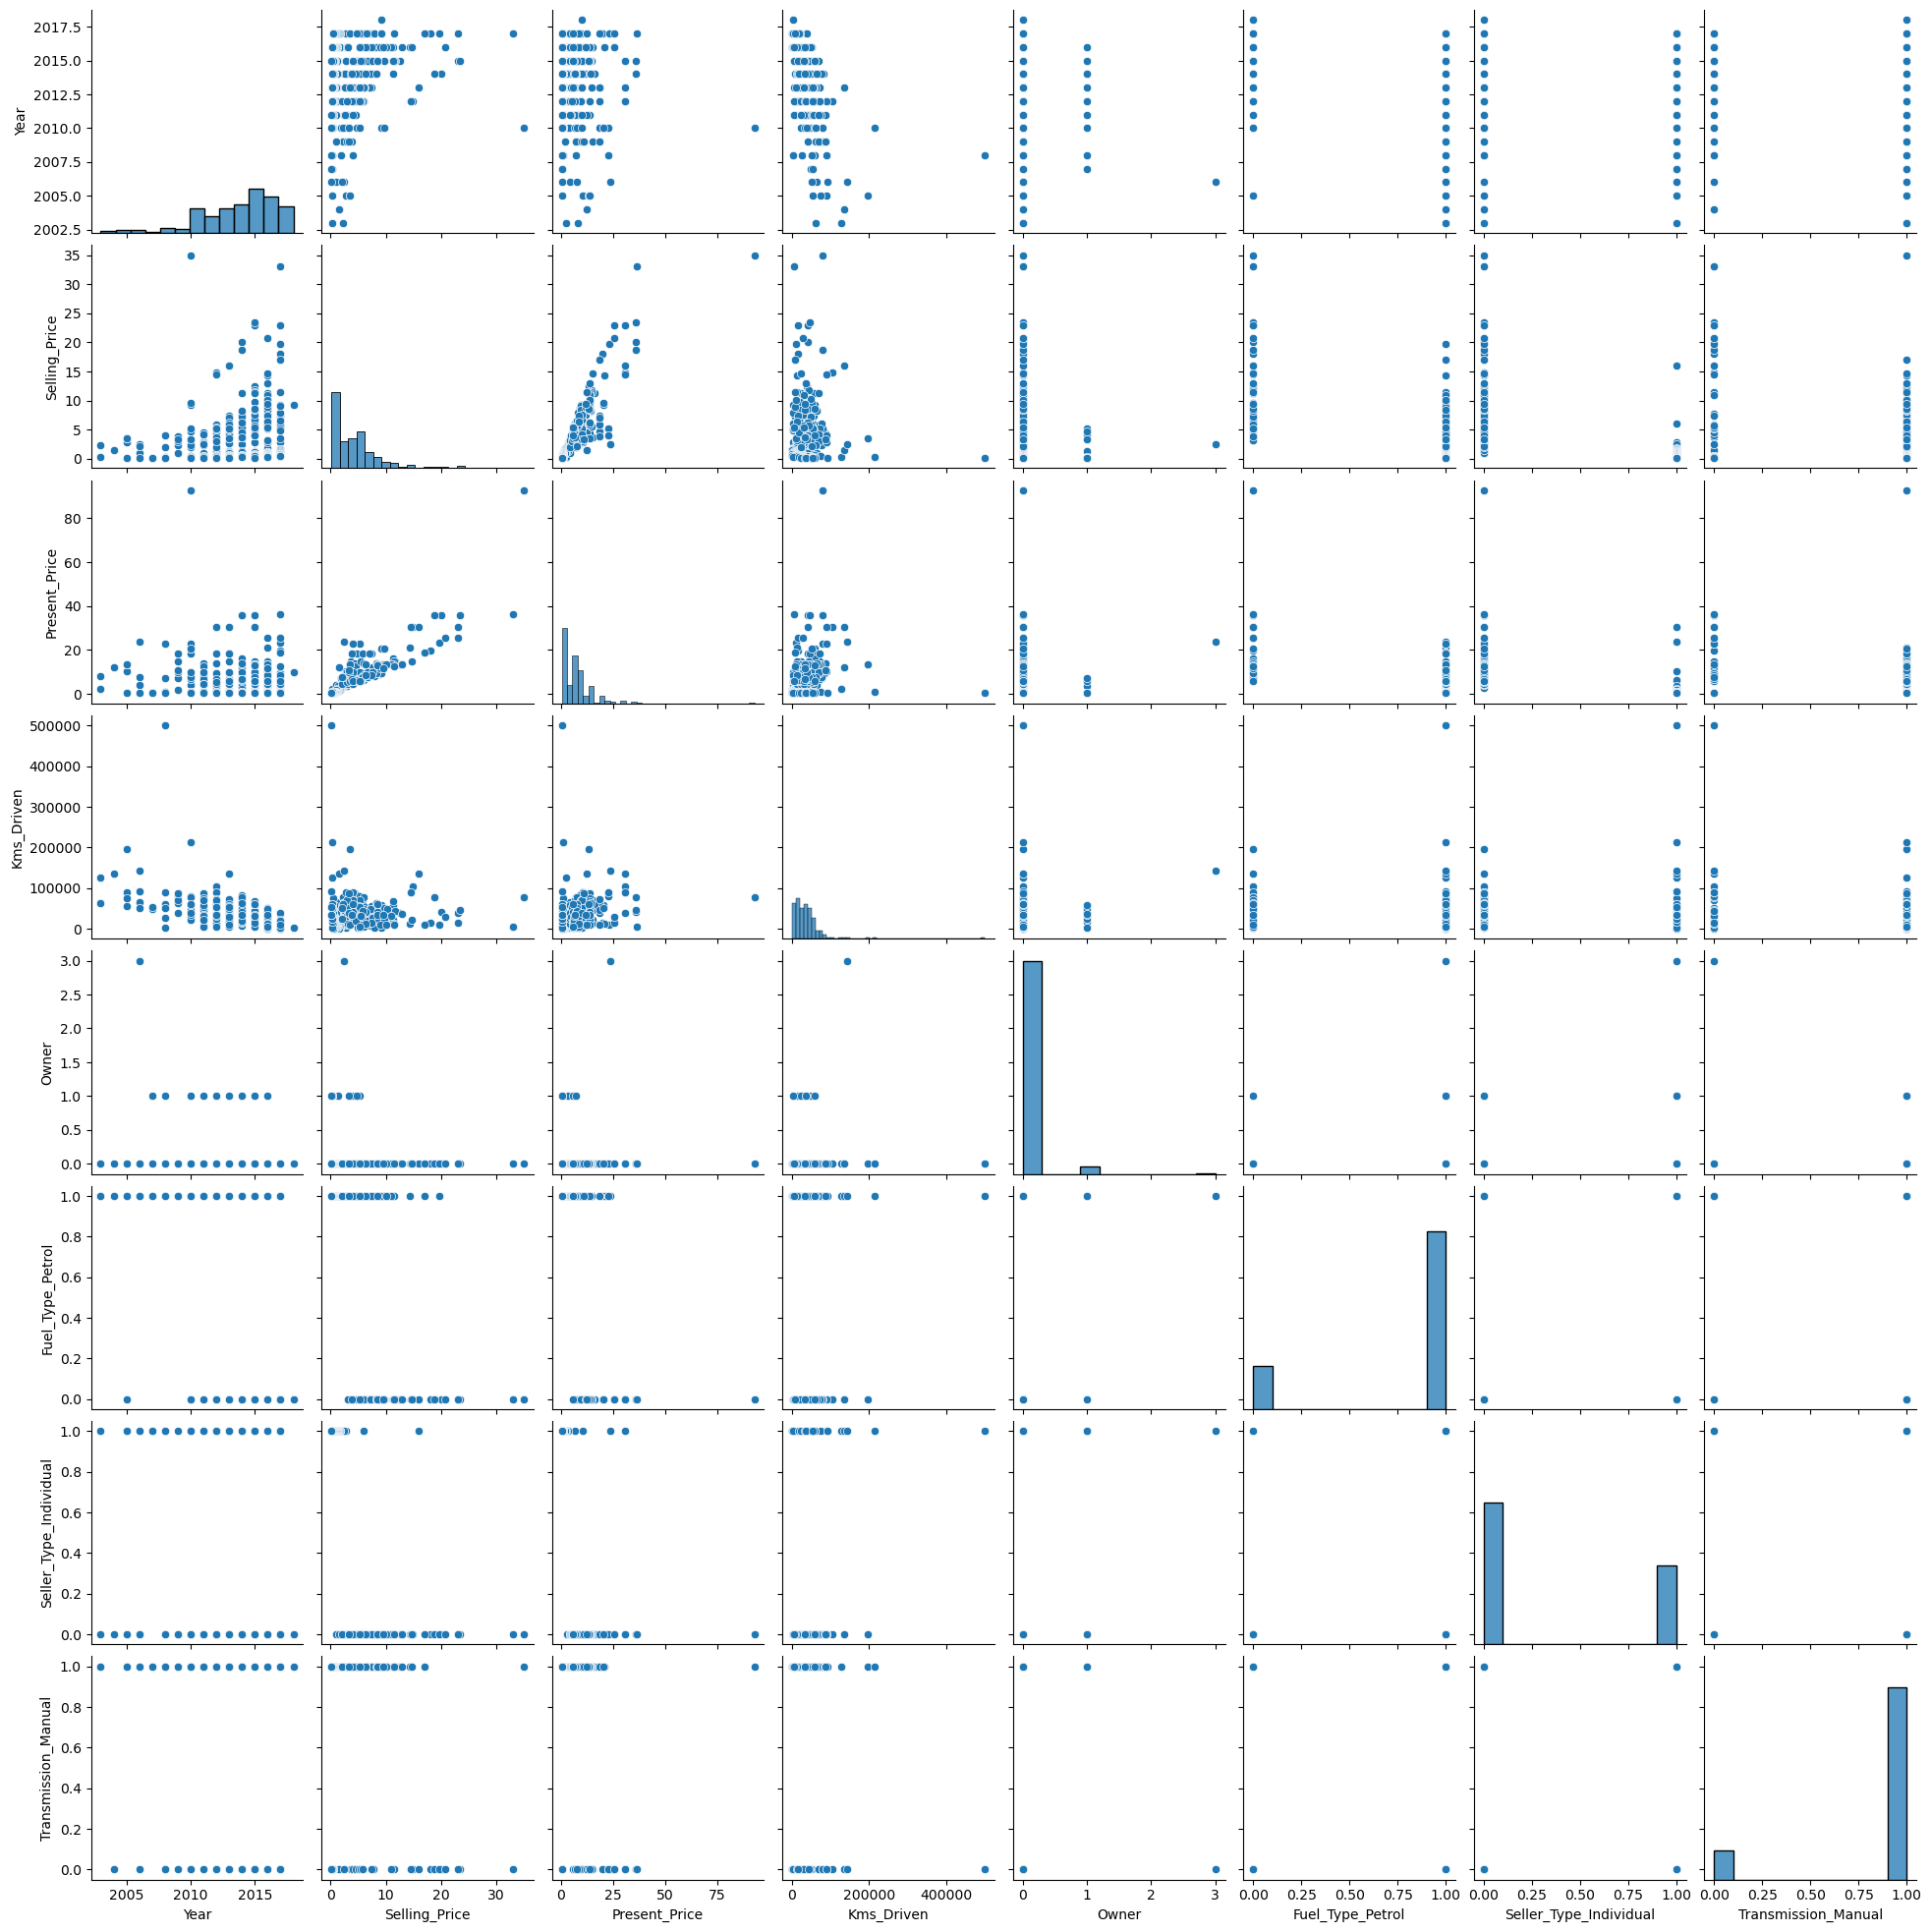

In [51]:
# Pairplot
sns.pairplot(df)

In [52]:
# Correlation
df.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Year,1.000000,0.234283,-0.053135,-0.525661,-0.182228,-0.055909,-0.038019,0.003998
Selling_Price,0.234283,1.000000,0.876533,0.028919,-0.088269,-0.543157,-0.556544,-0.348370
Present_Price,-0.053135,0.876533,1.000000,0.205261,0.009794,-0.464856,-0.513364,-0.334137
Kms_Driven,-0.525661,0.028919,0.205261,1.000000,0.089570,-0.173964,-0.100488,-0.164386
Owner,-0.182228,-0.088269,0.009794,0.089570,1.000000,0.052463,0.123012,-0.051741
Fuel_Type_Petrol,-0.055909,-0.543157,-0.464856,-0.173964,0.052463,1.000000,0.349259,0.085096
Seller_Type_Individual,-0.038019,-0.556544,-0.513364,-0.100488,0.123012,0.349259,1.000000,0.060745
Transmission_Manual,0.003998,-0.348370,-0.334137,-0.164386,-0.051741,0.085096,0.060745,1.000000


## Model Building

In [53]:
X = df.drop(["Selling_Price","Owner","Transmission_Manual"],axis=1)

### standardizing the Input Features.

In [54]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(X)
X  = pd.DataFrame(scaled_df,columns=X.columns)

In [55]:
X.head()

,Year,Present_Price,Kms_Driven,Fuel_Type_Petrol,Seller_Type_Individual
0,0.131349,-0.228248,-0.252793,0.492623,-0.744966
1,-0.213877,0.232066,0.156693,-2.029948,-0.744966
2,1.167027,0.268191,-0.767211,0.492623,-0.744966
3,-0.904330,-0.396058,-0.810719,0.492623,-0.744966
4,0.131349,-0.079083,0.142617,-2.029948,-0.744966


In [57]:
#  Splitting the data into Train and test.
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.2,random_state=7)

In [58]:
train_x

,Year,Present_Price,Kms_Driven,Fuel_Type_Petrol,Seller_Type_Individual
168,0.131349,-0.805096,-0.593179,0.492623,1.342344
108,0.131349,-0.599995,-0.764652,0.492623,1.342344
94,-0.213877,1.289039,0.207879,0.492623,-0.744966
139,0.821801,-0.781789,-0.303979,0.492623,1.342344
81,-2.975686,0.688883,4.102506,-2.029948,-0.744966
...,...,...,...,...,...
211,-0.559104,0.215751,-0.019898,0.492623,-0.744966
67,0.131349,-0.091902,0.873295,-2.029948,-0.744966
25,1.167027,-0.123366,-0.529197,0.492623,1.342344
196,-2.630460,-0.792277,1.416709,0.492623,1.342344


## LinearRegression Model

In [59]:
model=LinearRegression()
model.fit(train_x,train_y)

LinearRegression()

In [61]:
print(r2_score(train_y,model.predict(train_x)))
print(r2_score(test_y,model.predict(test_x)))

0.870434325219313
0.8784908248486769


## ANN Model

In [66]:
# Regression model building
model = Sequential()
model.add(Dense(units =5,kernel_initializer="he_uniform",activation="relu",input_dim=5))
model.add(Dense(units=20,kernel_initializer = "he_uniform",activation="relu"))
model.add(Dense(units=10,kernel_initializer = "he_uniform",activation= "relu"))
model.add(Dense(units=1,kernel_initializer="he_uniform"))
model.compile(
    optimizer="adam",loss="mae",metrics=["mae"])

In [67]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 5)                   │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 20)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [69]:
model.fit(train_x,train_y,validation_split=0.2,epochs=100)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.6375 - mae: 0.6375 - val_loss: 0.8885 - val_mae: 0.8885
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.6118 - mae: 0.6118 - val_loss: 0.8947 - val_mae: 0.8947
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.6367 - mae: 0.6367 - val_loss: 0.9019 - val_mae: 0.9019
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.6110 - mae: 0.6110 - val_loss: 0.8899 - val_mae: 0.8899
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.6551 - mae: 0.6551 - val_loss: 0.8705 - val_mae: 0.8705
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.6145 - mae: 0.6145 - val_loss: 0.8859 - val_mae: 0.8859
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.6710 - mae: 0.6710 - val_loss: 0.9049 - val_mae: 0.9049
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.6574 - mae: 0.6574 - val_loss: 0.8750 - val_mae: 0.8750
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.6262 - mae: 

In [70]:
from sklearn.metrics import r2_score
print(r2_score(train_y,model.predict(train_x)))

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
0.963113131672987


In [71]:
print(r2_score(test_y,model.predict(test_x)))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
0.9629474680212435


## ANN Model With HyperParameter Tuning

In [86]:
def build_model(hp):
    model = Sequential()
    for i in range(hp.Int("num_layers",1,5)):
        model.add(Dense(units=hp.Int(f"units_{i}",8,128,step=10),
                        activation="relu",
                        kernel_initializer = "he_uniform"))
        model.add(Dropout(hp.Float(f"dropout_{i}",0.1,0.5,step=0.1)))
    model.add(Dense(units=1,kernel_initializer="he_uniform"))
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice("learning_rate",[1e-1,1e-2,1e-3,1e-4])),
                  loss="mae",
                  metrics=["mae"])
    return model
    

In [90]:
tuner = RandomSearch(
    build_model,
    objective="mae",
    max_trials=10,
    executions_per_trial =3,
    directory="tuner_weight",
    project_name = "car_price_prediction"
)

In [91]:
tuner.search(train_x,train_y,epochs=100,validation_split=0.2)

Trial 10 Complete [00h 01m 34s]
mae: 2.9646225770314536

Best mae So Far: 0.5991259614626566
Total elapsed time: 00h 15m 07s


In [92]:
best_model=tuner.get_best_models(num_models=1)[0]

In [93]:
best_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 98)                  │             588 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 98)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          12,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,389 (52.30 KB)

 Trainable params: 13,389 (52.30 KB)

 Non-trainable params: 0 (0.00 B)

In [94]:
print(r2_score(train_y,best_model.predict(train_x)))

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
0.9827053479983894


In [95]:
print(r2_score(test_y,best_model.predict(test_x)))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
0.9740357614473689


In [96]:
X.columns

Index(['Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type_Petrol',
       'Seller_Type_Individual'],
      dtype='object')

In [97]:
year = 2021
present_Price = 12
Kms_Driven = 10000
Fuel_Type = "Petrol"
Seller_Type = "Individudal"
fuel = 1 if Fuel_Type == "Petrol" else 0
seller = 1 if Seller_Type == "Individual" else 0



In [102]:
input = {
    "Year":[year],
    "Present_Price":[present_Price],
    "Kms_Driven":[10000],
    "Fuel_Type_Petrol":[fuel],
    "Seller_Type_Individual":[seller]
    
}
data = pd.DataFrame(input)
scaled = scaler.transform(data)
data_input = pd.DataFrame(scaled,columns=data.columns)


In [103]:
best_model.predict(data_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


array([[13.068338]], dtype=float32)

In [104]:
model.predict(data_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


array([[13.285316]], dtype=float32)

In [73]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 20)                  │             100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,025 (4.01 KB)

 Trainable params: 341 (1.33 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 684 (2.68 KB)

## RandomForest Model

In [106]:
randomforest = RandomForestRegressor()

In [107]:
randomforest.fit(train_x,train_y)

RandomForestRegressor()

In [108]:
print(r2_score(train_y,randomforest.predict(train_x)))

0.9864206176714096


In [109]:
print(r2_score(test_y,randomforest.predict(test_x)))

0.9582039257490548


In [112]:
params = {
    "n_estimators":[1,2,3,4,5,6,7,8,9,10,20,30,50,100],
    "min_samples_split":[3,4,5,6,7]
}

In [113]:
gridsearch = GridSearchCV(estimator = randomforest,param_grid = params,scoring="accuracy",n_jobs=-1)

In [114]:
gridsearch.fit(train_x,train_y)

GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'min_samples_split': [3, 4, 5, 6, 7],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30,
                                          50, 100]},
             scoring='accuracy')

In [115]:
gridsearch.best_params_

{'min_samples_split': 3, 'n_estimators': 1}

In [137]:
model =RandomForestRegressor(min_samples_split=3)

In [130]:
model

RandomForestRegressor(min_samples_split=3, n_estimators=6)

In [138]:
model.fit(train_x,train_y)

RandomForestRegressor(min_samples_split=3)

In [139]:
print(r2_score(train_y,model.predict(train_x)))

0.9854730729263661


In [140]:
print(r2_score(test_y,model.predict(test_x)))

0.9570393899717042


In [144]:
model.predict(data_input)

array([9.731875])

## Training the model with total dataset.

In [161]:
model.fit(X,Y)

RandomForestRegressor(min_samples_split=3)

In [162]:
print(r2_score(train_y,model.predict(train_x)))

0.9884766017090276


In [163]:
print(r2_score(test_y,model.predict(test_x)))

0.9937337746543136


## Saving the model and standardizer.

In [164]:
joblib.dump(model,"model.pkl")
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']

In [165]:
scaler=joblib.load("scaler.pkl")
model = joblib.load("model.pkl")

In [166]:
X.columns

Index(['Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type_Petrol',
       'Seller_Type_Individual'],
      dtype='object')

In [167]:
inputs={
    "Year":[2021],
    "Present_Price":[12],
    "Kms_Driven":[20000],
    "Fuel_Type_Petrol":[1],
    "Seller_Type_Individual":[0]
}
inputs = pd.DataFrame(inputs)
scaled_input = scaler.transform(inputs)
inputs = pd.DataFrame(scaled_input,columns=inputs.columns)

In [168]:
inputs

,Year,Present_Price,Kms_Driven,Fuel_Type_Petrol,Seller_Type_Individual
0,2.547931,0.518742,-0.431944,0.492623,-0.744966


In [169]:
model.predict(inputs)

array([9.39354167])